In [1]:
from src.utils import *
from src.models.vae import *
from src.trainer import *
from src.models.ae import *

In [2]:
train_loader, val_loader, test_loader = load_cifar10_dataset(batch_size=32, val_split=0.2)

print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(val_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")

Files already downloaded and verified
Files already downloaded and verified
Training set size: 40000
Validation set size: 10000
Test set size: 10000


In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [4]:
vae_model = VariationalAutoEncoder()
vae_optimizer = torch.optim.Adam(vae_model.parameters(), lr=5e-04)
vae_model.to(device)

# Initialize and train
vae_trainer = GeneralTrainer(
    model=vae_model,
    optimizer=vae_optimizer,
    loss_fn=VariationalAutoEncoder.loss_function,
    device=device,
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    log_dir="tensorboard/vae_logs",
    checkpoint_dir="tensorboard/vae_checkpoints",
    post_process_fn=VariationalAutoEncoder.post_process_fn
)

In [11]:
vae_trainer.train(n_epochs=5)

Epoch 14: Train Loss = 56327.328981, Validation Loss = 56152.438969
Saved best model to tensorboard/vae_checkpoints/best_model.pth
Epoch 15: Train Loss = 56301.578753, Validation Loss = 56229.383766
Epoch 16: Train Loss = 56280.789419, Validation Loss = 56129.188375
Saved best model to tensorboard/vae_checkpoints/best_model.pth
Epoch 17: Train Loss = 56259.266284, Validation Loss = 56075.811406
Saved best model to tensorboard/vae_checkpoints/best_model.pth
Epoch 18: Train Loss = 56236.322897, Validation Loss = 56108.647369


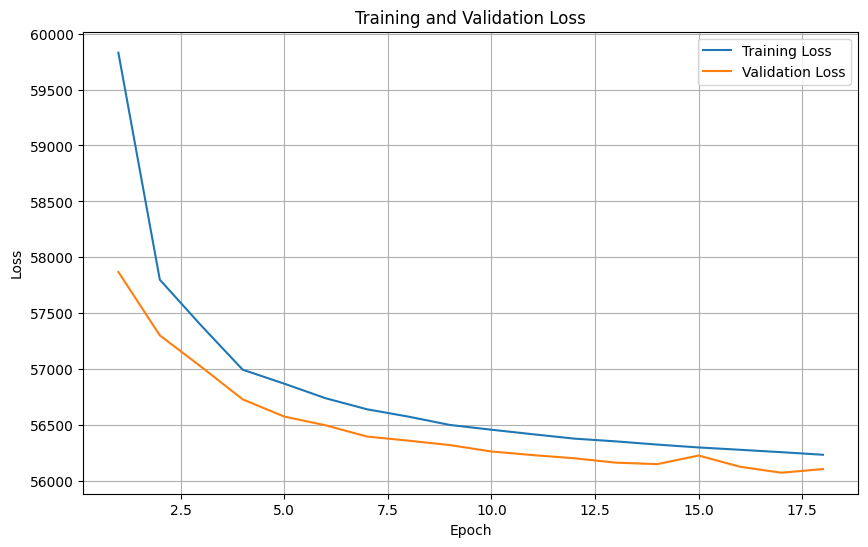

In [12]:
vae_trainer.plot_losses()

In [10]:
vae_model.sample(num_samples=10, device=device, show=True)
_

TypeError: VariationalAutoEncoder.sample() got an unexpected keyword argument 'device'

In [5]:
ae_model = AutoEncoder()
ae_optimizer = torch.optim.Adam(ae_model.parameters(), lr=5e-04)
ae_model.to(device)

# Initialize and train
ae_trainer = GeneralTrainer(
    model=ae_model,
    optimizer=ae_optimizer,
    loss_fn=nn.MSELoss(),
    device=device,
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    log_dir="tensorboard/ae_logs",
    checkpoint_dir="tensorboard/ae_checkpoints"
)

In [7]:
ae_trainer.train(n_epochs=10)

Epoch 11: Train Loss = 0.003743, Validation Loss = 0.003663
Saved best model to tensorboard/ae_checkpoints/best_model.pth
Epoch 12: Train Loss = 0.003642, Validation Loss = 0.003574
Saved best model to tensorboard/ae_checkpoints/best_model.pth
Epoch 13: Train Loss = 0.003561, Validation Loss = 0.003536
Saved best model to tensorboard/ae_checkpoints/best_model.pth
Epoch 14: Train Loss = 0.003489, Validation Loss = 0.003450
Saved best model to tensorboard/ae_checkpoints/best_model.pth
Epoch 15: Train Loss = 0.003433, Validation Loss = 0.003381
Saved best model to tensorboard/ae_checkpoints/best_model.pth
Epoch 16: Train Loss = 0.003385, Validation Loss = 0.003362
Saved best model to tensorboard/ae_checkpoints/best_model.pth
Epoch 17: Train Loss = 0.003340, Validation Loss = 0.003298
Saved best model to tensorboard/ae_checkpoints/best_model.pth
Epoch 18: Train Loss = 0.003302, Validation Loss = 0.003311
Epoch 19: Train Loss = 0.003271, Validation Loss = 0.003241
Saved best model to tensor